<a href="https://colab.research.google.com/github/Sanjeevani200303/Telecom-churn/blob/main/telecomproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco_Customer_Churn_Dataset  (3).csv to Telco_Customer_Churn_Dataset  (3).csv


#**Project Title: Customer Segmentation Visualization & Advanced Analysis**

**Project Overview:**

The project aims to analyze customer churn in a telecommunications company and develop predictive models to identify at-risk customers. The ultimate goal is to provide actionable insights and recommendations to reduce churn and improve customer retention.

#Now we perform the analysis of the data set in detailed steps.

First we import the required libraries and our dataset and then perform data exploration and cleaning

In [ ]:
import pandas as pd
df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")


Check for null values

In [ ]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Check data types

In [ ]:
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Convert TotalCharges to numeric (coerce errors to NaN)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


Drop rows with missing TotalCharges (they’re usually tenure = 0)

In [ ]:
df = df.dropna(subset=['TotalCharges'])


Check for and remove duplicate rows

In [ ]:
df = df.drop_duplicates()


**Final check**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

#**TASK 1 : DATA OVERVIEW AND SIMPLE SORTING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Telco_Customer_Churn_Dataset  (3).csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Sort by tenure in ascending order (shortest first)

In [ ]:
shortest_tenure = df.sort_values(by='tenure', ascending=True)
shortest_tenure.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag,TenureGroup,ChargeGroup
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Two year,No,Mailed check,80.85,,No,0,NaN,61-90
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,Two year,No,Mailed check,20.25,,No,0,NaN,0-30
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,One year,Yes,Mailed check,19.70,,No,0,NaN,0-30
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,Two year,No,Mailed check,25.35,,No,0,NaN,0-30
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0,NaN,31-60


# Sort by tenure in descending order (longest first)

In [ ]:
longest_tenure = df.sort_values(by='tenure', ascending=False)
longest_tenure.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag,TenureGroup,ChargeGroup
3177,1814-WFGVS,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,No,Two year,No,Mailed check,48.90,3527,No,0,61-72,31-60
3131,8336-TAVKX,Female,1,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Two year,No,Bank transfer (automatic),78.45,5682.25,No,0,61-72,61-90
3107,5038-ETMLM,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),113.65,8182.75,No,0,61-72,91-120
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No,0,61-72,91-120
3111,8809-RIHDD,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Two year,Yes,Electronic check,103.40,7372.65,Yes,1,61-72,91-120


# Filter only churned customers

In [ ]:
churned_customers = df[df['Churn'] == 'Yes']
churned_customers.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag,TenureGroup,ChargeGroup
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0-12,31-60
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0-12,61-90
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,0-12,91-120
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,25-48,91-120
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,49-60,91-120



# Summary statistics

In [ ]:
# Overview of data types and non-null counts
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

,SeniorCitizen,tenure,MonthlyCharges,ChurnFlag
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


# **TASK 2: CHURNED COUNT VISUALIZATION**

#VISUALIZE THE COUNT OF CHURNED VS. NON-CHURNED CUSTOMERS

FIRST WE SEE WHO ALL CUSTOMERS OPTED OUT OF THE SUBSCRIPTION AND WHO DID NOT

In [ ]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#WE USE A COLUMN CHART CALLED "**CUSTOMER CHURN COUNT**" TO VISUALIZE THE COUNT OF OUR CHURNED AND NON CHURNED CUSTOMERS - WITH X-AXIS AS **CHURN** AND Y-AXIS AS **NUMBER OF CUSTOMERS**.

<ipython-input-12-1f296dda7a93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")


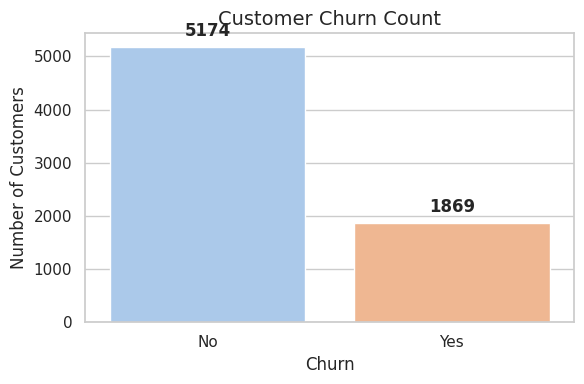

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="pastel")
plt.title('Customer Churn Count', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

for i, v in enumerate(churn_counts.values):
    ax.text(i, v + 200, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

#**TASK 3 : MONTHLY CHARGES DISTRIBUTION**


#Analyzing the distribution of monthly charges using a histogram

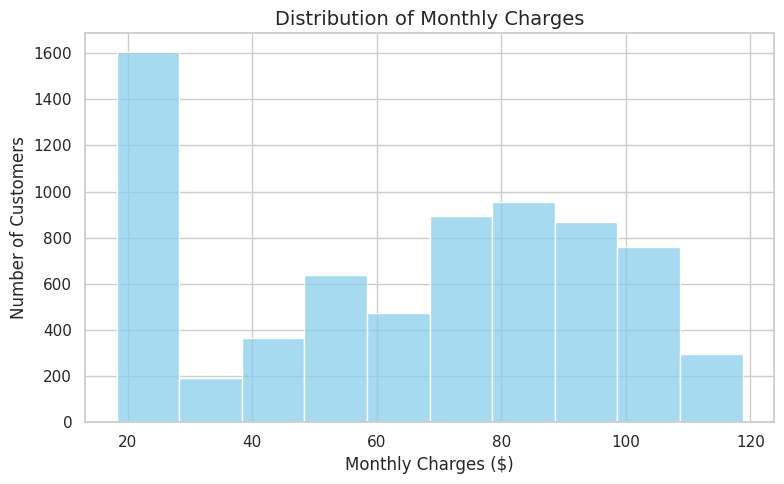

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], bins=10, kde=False, color='skyblue')


plt.title('Distribution of Monthly Charges', fontsize=14)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

#**Task 4 : Churn rates by gender**

# Create a pivot table with gender and churn counts

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


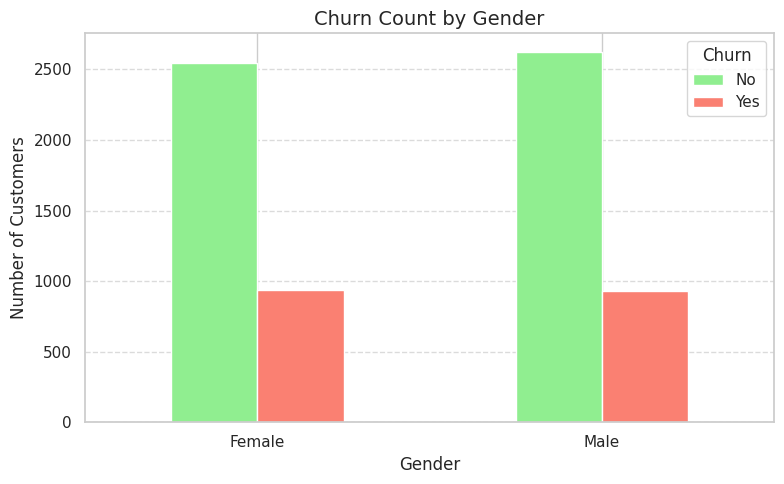

In [ ]:
pivot_table = pd.crosstab(df['gender'], df['Churn'])
print(pivot_table)

import matplotlib.pyplot as plt

# Plot the pivot table as a grouped bar chart
pivot_table.plot(kind='bar', figsize=(8, 5), color=['lightgreen', 'salmon'])

# Chart formatting
plt.title('Churn Count by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()